###Welcome

In this project we will build a Breast Cancer Classifier using the K-Nearest Neighbor Machine Learning Algorithm

We will try and predict whether a tumor is benign or malignant which means a Binary outcome, either 1 or 0

Please Note: I will cover the concepts behind the K-Neareast Neighbor algorithm in another project

These include:

1. Visualizing N dimensional spaces
2. Comparing data points using the distance formula
3. How we classify a K-Nearest Neighbor or simply a point with an unknown class
4. Why is it important to fine tune the parameters of the algorithm = The number of K's 
5. Overfitting and Underfitting
6. The importance of Normalizing data with Different Scales
7. Different Techniques for normalizing data = Getting the different dimensions of the data into a similar scale

In [1]:
#Let's first import the libraries we will use

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [14]:
#Then lets import the dataset directly from the scikit learn library

from sklearn.datasets import load_breast_cancer
bc_data = load_breast_cancer()

In [15]:
#Now let's print the first data point to see how it looks, we will print the labels after to understand what each of these data points mean

print(bc_data.data[0])

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


In [16]:
#Print the feature names

print(bc_data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Now let's make it clear what we are trying to classify, we will print the binary labels 0 or 1 for the dataset and then the target names. 

In [17]:
#These are the binary labels, 1 = Benign and 0 = Malignant
print(bc_data.target_names)
print(bc_data.target)

['malignant' 'benign']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1

In [18]:
#Now we split our data by calling the train_test_split function

#The function takes the data we want to split, the target labels, the test size = 20% and we initialize the random state at 100 so the data is split the same way every time we run our algorithm

training_data, validation_data, training_labels, validation_labels = train_test_split(
    bc_data.data, bc_data.target, test_size = 0.2, random_state = 100)

In [19]:
#Let's check if our data was split correctly = 80% Training 
print(len(training_data))
print(len(training_labels))

#And 20% validation
print(len(validation_data))
print(len(validation_labels))

455
455
114
114


Great, now we will create a KNeighbors Classifier

In [24]:
#And give it a total number of 3 neighbors

k_classifier = KNeighborsClassifier(n_neighbors = 3)

In [25]:
#Let's train the k_classifier by feeding it the training data and training labels

k_classifier.fit(training_data, training_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [26]:
#Now let's see how accurate were the classifications

print(k_classifier.score(validation_data, validation_labels))

0.9473684210526315


###Great, we achieved an accuracy score of 94.7%

Let's find out if we can improve the accuracy of the model, to do this we will create a simple for loop that will iterate from 1 to 100 k neighbors too see which one has the highest accuracy

In [42]:
accuracy_scores = []

for k in range(1, 101):
    k_classifier = KNeighborsClassifier(n_neighbors = k)
    k_classifier.fit(training_data, training_labels)
    #We are appending the accuracy values to create our y axis and graph the results in the following step
    accuracy_scores.append(k_classifier.score(validation_data, validation_labels))
    print(k_classifier.score(validation_data, validation_labels))

0.9298245614035088
0.9385964912280702
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.9649122807017544
0.9649122807017544
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.9473684210526315
0.956140350877193
0.9473684210526315
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.956140350877193
0.956

Fantastic by iterating through the model we found a higher level of accuracy

Let's now create a graph to better visualize the results

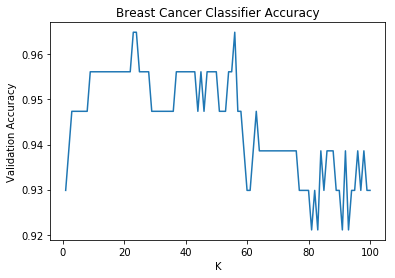

In [44]:
#Create the x axis
k_list = range(1, 101)

#Plot the graph

plt.plot(k_list, accuracy_scores)
plt.xlabel('K')
plt.ylabel('Validation Accuracy')
plt.title('Breast Cancer Classifier Accuracy')
plt.show()

###Fantastic our model is the most accurate using 23 Neighbors, Classifiying breast cancer tumors with a 96.49% Accuracy